# Phân tích đa biến
Trong tuần này chúng ta sẽ tiến hành phân tích mối tương quan giữa các biến trong một bảng dữ liệu để thấy được mối quan hệ. Từ đó, cho phép chọn lựa các đặc trưng phù hợp để giải quyết bài toán.

Đầu tiên, tương tự như các bài tập trước, ta sẽ import những thư viện cần thiết

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Ở bài này, ta sẽ EDA những feature để phục vụ cho cho mô hình dự đoán (predict), trong đó:
* Output (giá trị cần dự đoán) là cột `Survived`.
* Các feature còn lại (ví dụ: `Pclass`, `Name`, `Sex`, `Age`) đóng vai trò là input của mô hình.

*Việc đầu tiên cần làm* là đọc file dữ liệu csv bằng thư viện `pandas` như những bài trước và lưu dataframe vào biến `df`

In [46]:
df = pd.read_csv("./data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 1. Thống kê phân bố theo giá trị output

Tiếp theo, ta phân tích output feature có tên là `Survived` để quan sát tập giá trị đầu ra và phân bố của các giá trị này:

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


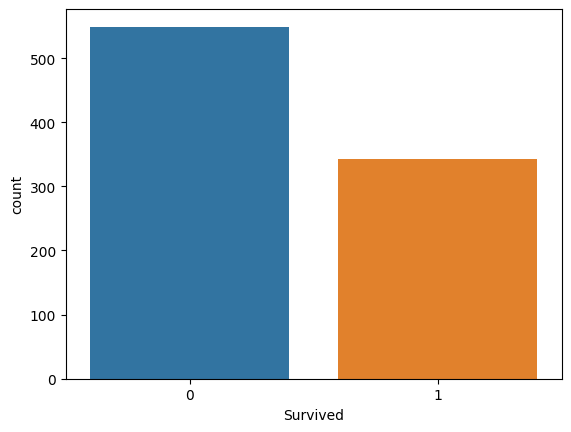

In [47]:
sns.countplot(x=df['Survived']);

Dựa vào biểu đồ ta có thể thấy, đây là bài toán phân loại nhị phân (binary classification) với hai nhãn đầu ra cần dự đoán là `0` và `1`. Trong đó, số lượng nhãn 0 chiếm tỉ trọng cao hơn so với nhãn 1.

Tiếp đến, ta sẽ phân tích xem **những cột còn lại có liên quan gì đến cột `Survived` này hay không**.

Đầu tiên là thống kê phân bố của nhãn cần dự đoán theo cột `Sex` (giới tính):

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

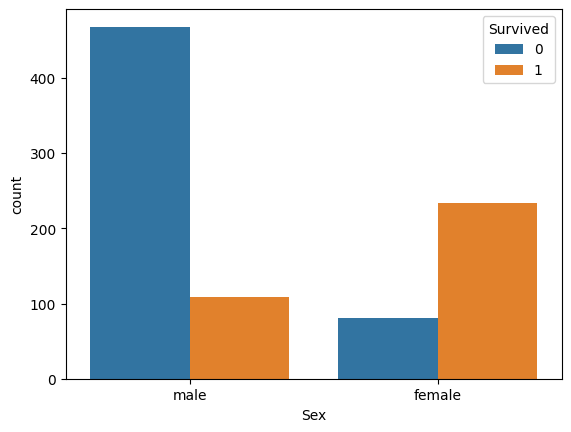

In [48]:
sns.countplot(x=df['Sex'], hue=df['Survived'].astype(str));

**Nhận xét**: Dựa vào biểu đồ trên, ta thấy tỉ lệ nữ còn sống so với nữ đã mất cao hơn tỉ lệ đó trên tập nam giới.

Ta thấy việc phân tích từng cột thế này **quá mất thời gian**, ta quyết định phân tích và hiển thị cùng lúc tất cả các cột có dạng dữ liệu Category hoặc những cột dạng Numerical mà ít labels như: [`Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`] bằng hàm `countplot` của thư viện `seaborn` và `subplot` của thư viện `matplotlib`.

Với từng subplot (của thư viện `matplotlib`), ta dùng hàm `sns.countplot(x=..., hue=..., ax=...)` để vẽ các biểu đồ phân tích. Trong đó cần phải truyền vào:
* Tham số `x` là những cột theo thứ tự trong cols, và chạy từ trên xuống dưới, trái qua phải.
* Tham số `hue` = cột 'Survived'

Các bạn cần hoàn thành bằng cách duyệt từ trên xuống dưới, từ trái qua phải các subplot để vẽ từng biểu đồ phân tích phân bố của giá trị output theo từng biến input đã nêu ở trên.

Vì số lượng ô của subplot là 2 dòng x 3 cột = 6 ô, trong khi số lượng đặc trưng cần hiển thị chỉ có 5, do đó ta cần phải xoá ô cuối cùng. Để xóa ô cuối cùng này ta sử dụng hàm `set_visible`. Đoạn code này đã được cung cấp ngay phía sau.

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

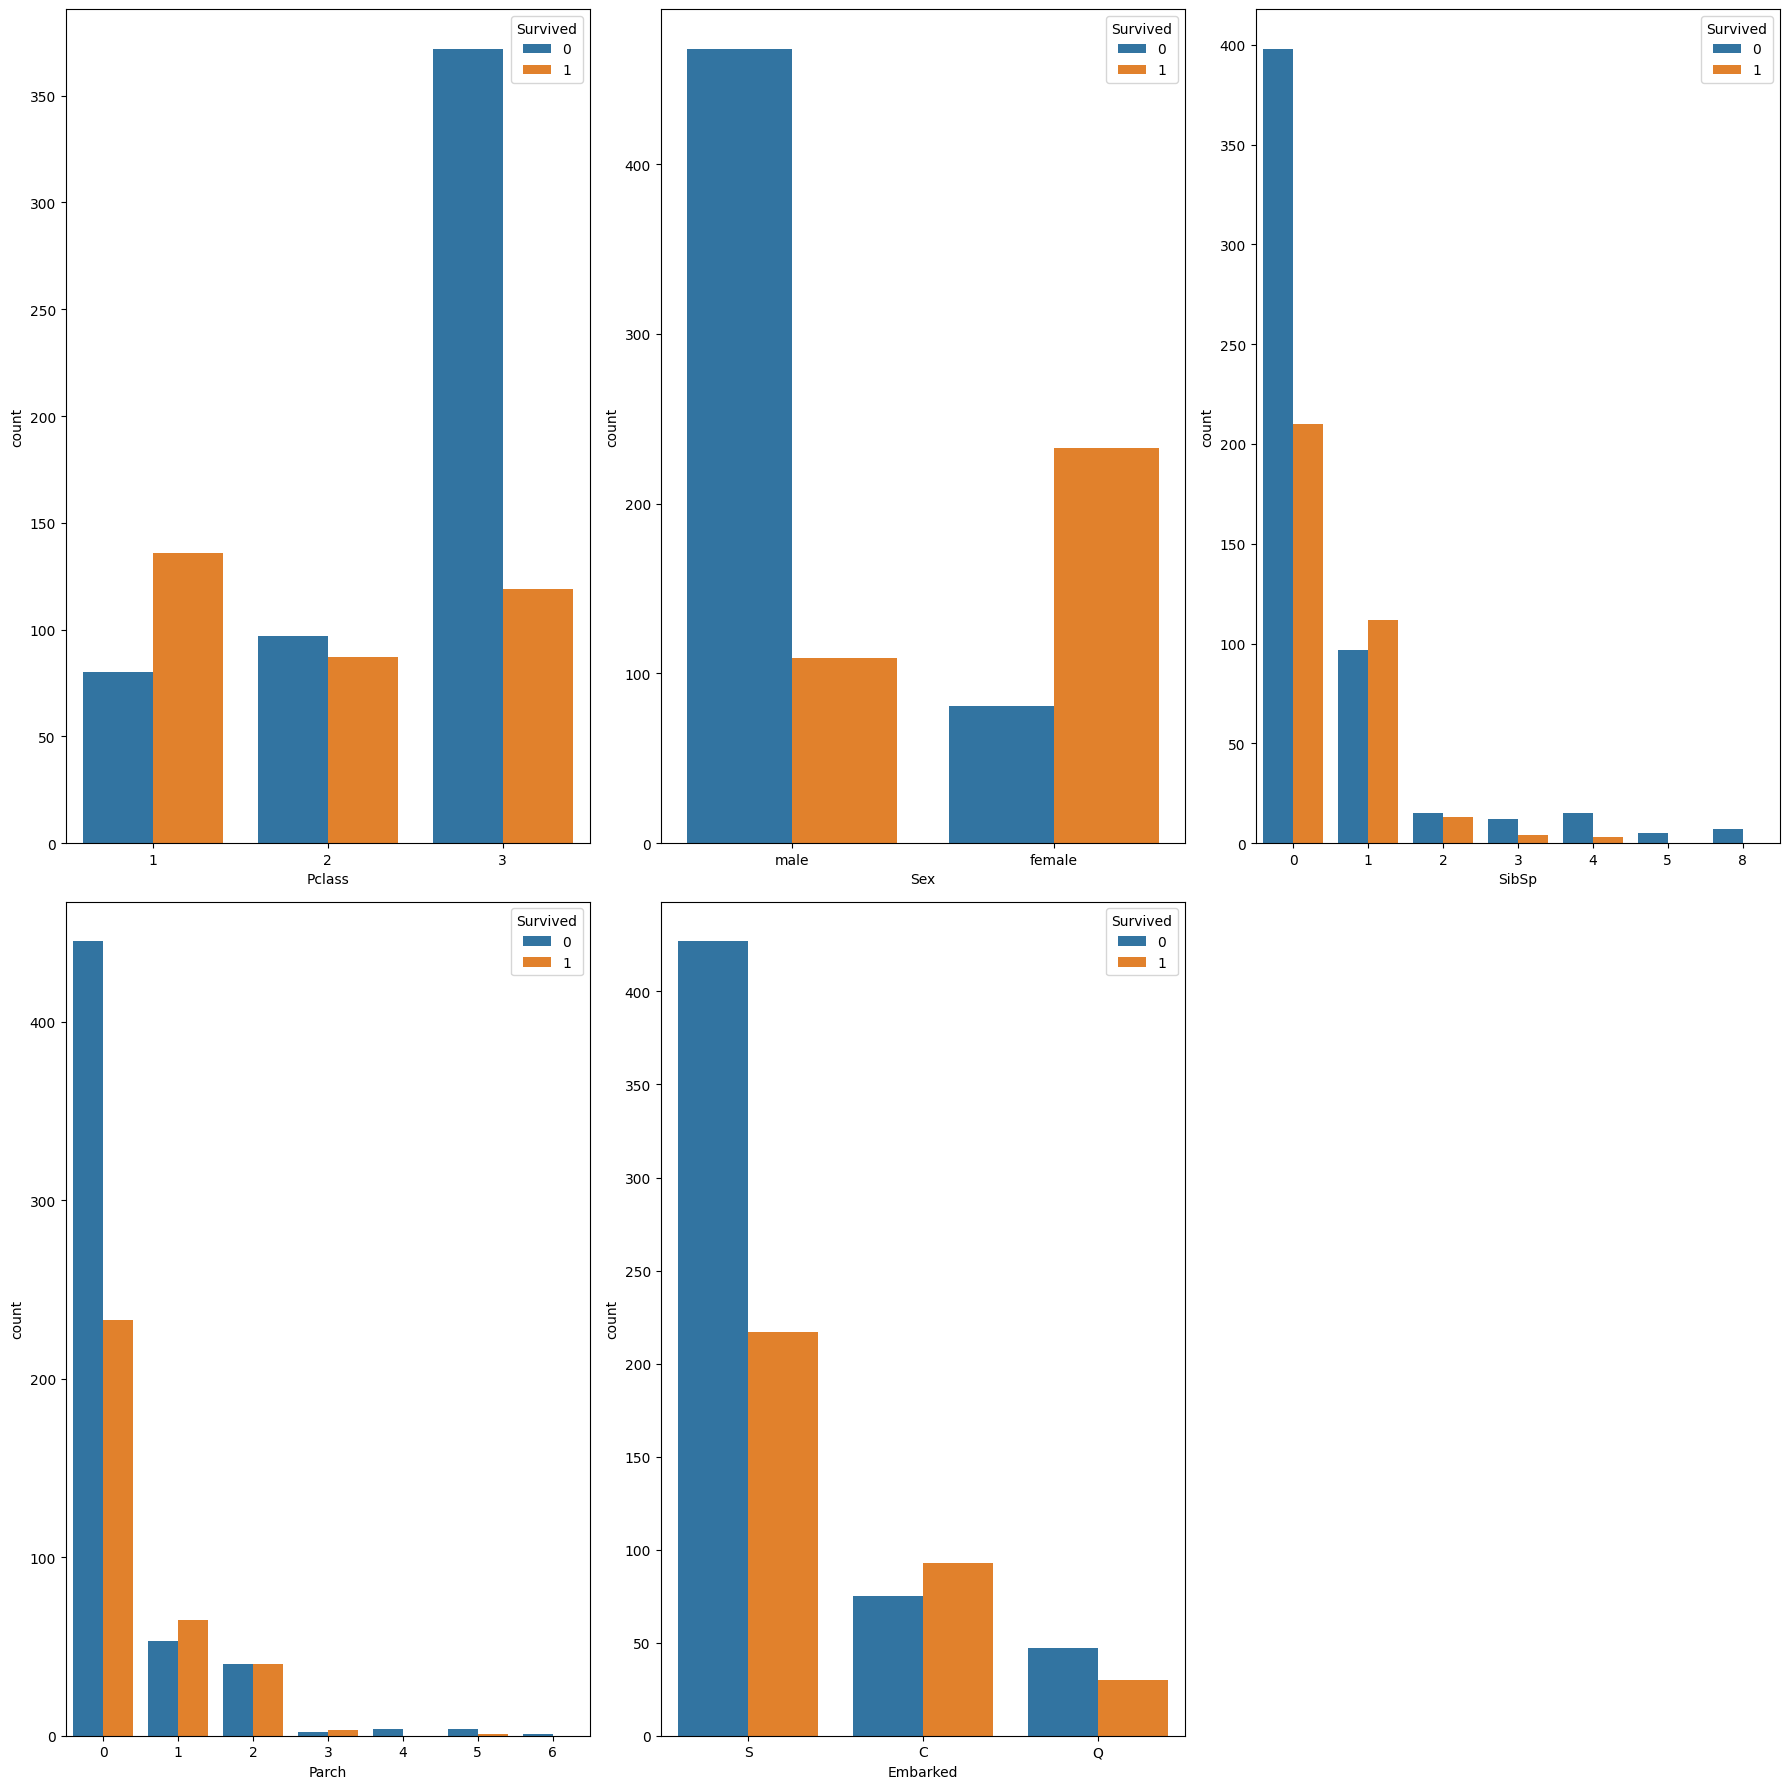

In [49]:
# Danh sách  5 cột cần hiển thị theo thứ tự
cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Tạo subplot kích thước 2 x 3
fig, ax = plt.subplots(2, 3, figsize=(18, 18))
index = 0

### BEGIN SOLUTION
for i, col in zip(range(len(cols)), cols):
    sns.countplot(x=df[col], hue=df['Survived'].astype(str), ax=ax.flat[i])


### END SOLUTION

# Xóa ô cuối cùng vì chỉ có 5 cột cần hiển thị
ax.flat[-1].set_visible(False)
plt.tight_layout()

fig.savefig('part_1.png')

**Nhận xét**:
  * Ở cột `PClass`:
    - Class 3 có tỉ lệ chết (0) cao hơn đột biến so với tỉ lệ sống (1)
    - Class 2 có tỉ lệ chết và sống gần như bằng nhau
    - Class 1 có tỉ lệ sống cao hơn
  * Ở cột `SibSp`:
    - Đa số tỉ lệ chết (0) đều cao hơn tỉ lệ sống (1)
    - Riêng ở cột có giá trị 1 thì tỉ lệ sống cao hơn đôi chút
  * Ở cột `Parch`:
    - Đa số tỉ lệ chết (0) đều cao hơn tỉ lệ sống (1)
    - Riêng ở cột có giá trị 1 thì tỉ lệ sống cao hơn đôi chút
  * Ở cột `Embarked`:
    - Vẫn giống những cột ở trên, ở cột này tỉ lệ chết (0) vẫn trội hơn so với sống (1)
  **Ta nhận thấy cột `SibSp` và `Parch` gần như giống nhau về sự ảnh hưởng đối với cột `Survived`*

Tiếp theo là những cột ['Age', 'Fare'], đây là dữ liệu dạng numerical (số), nếu ta dùng countplot như trên sẽ rất khó quan sát và phân tích:

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


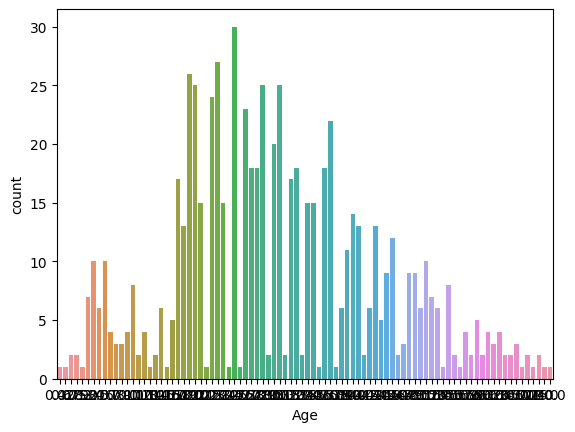

In [50]:
sns.countplot(x=df['Age']);

Do đó, ở đây mình sẽ dùng hàm `histplot` của thư viện `seaborn` để phân tích. Trong đó, cần phải truyền vào:
* Tham số `x` là cột `Age`
* Tham số `hue` là cột `Survived`
* Tham số `kde`=`True`: tham số để phân tích dạng đường phân bố liên tục.

Kết quả của việc phân tích này được lưu vào biến `check1_sv` = `sns.histplot(...)`.






c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

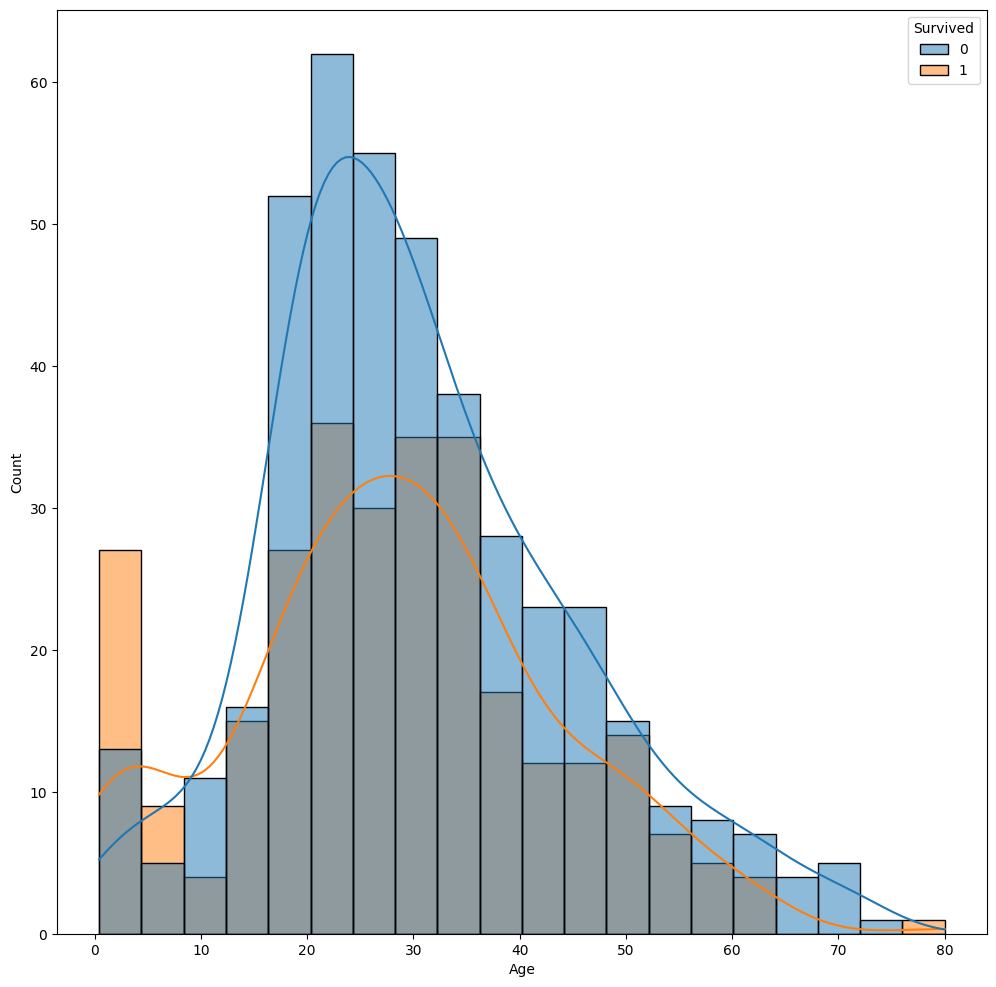

In [51]:
plt.figure(figsize=(12, 12))
### BEGIN SOLUTION
check1_sv = sns.histplot(x=df['Age'], hue=df['Survived'], kde=True)
### END SOLUTION

plt.savefig('part_2.png')

**Nhận xét**: Ta có thể nhận xét, từ khoảng 0 đến 10 tuổi thì tỉ lệ sống sót cao hơn tỉ lệ mất.

Tương tự, ta sẽ phân tích cột `Fare` so với cột output `Survived`:

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

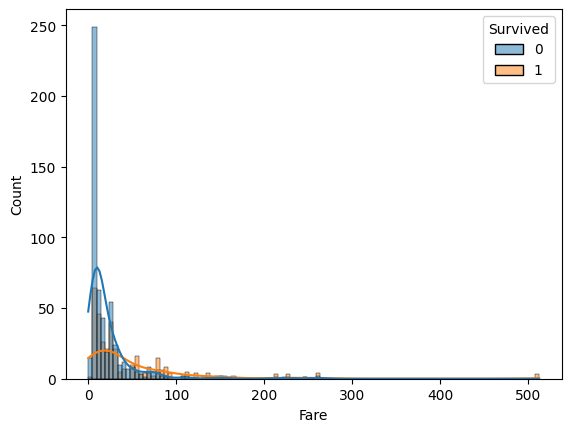

In [52]:
sns.histplot(x=df['Fare'], hue=df['Survived'], kde=True);

**Nhận xét**: Ta thấy nó khá khó nhìn nên ta sẽ dùng phương pháp binning Quantile.

Do đó, ta sẽ dùng hàm `countplot` của `Seaborn` để phân tích. Trong đó, cần phải truyền vào:
* Tham số `x`=`bins`, với `bins` là kết quả của quá trình binning (đã được cung cấp)
* Tham số `hue`= cột `Survived`

Kết quả của phân tích này ta lưu vào biến `check2_sv`.

c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\datta\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\datta\AppData\Local\Programs\Python\Python3

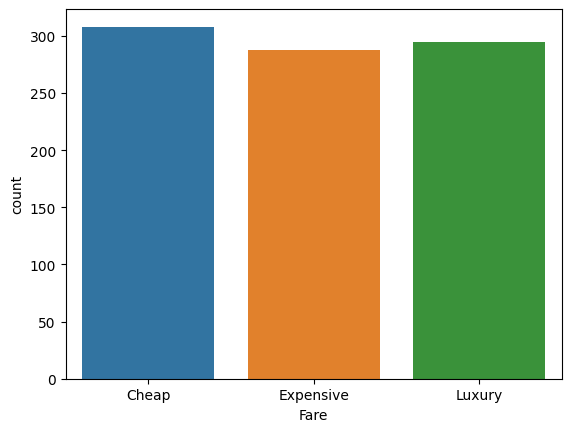

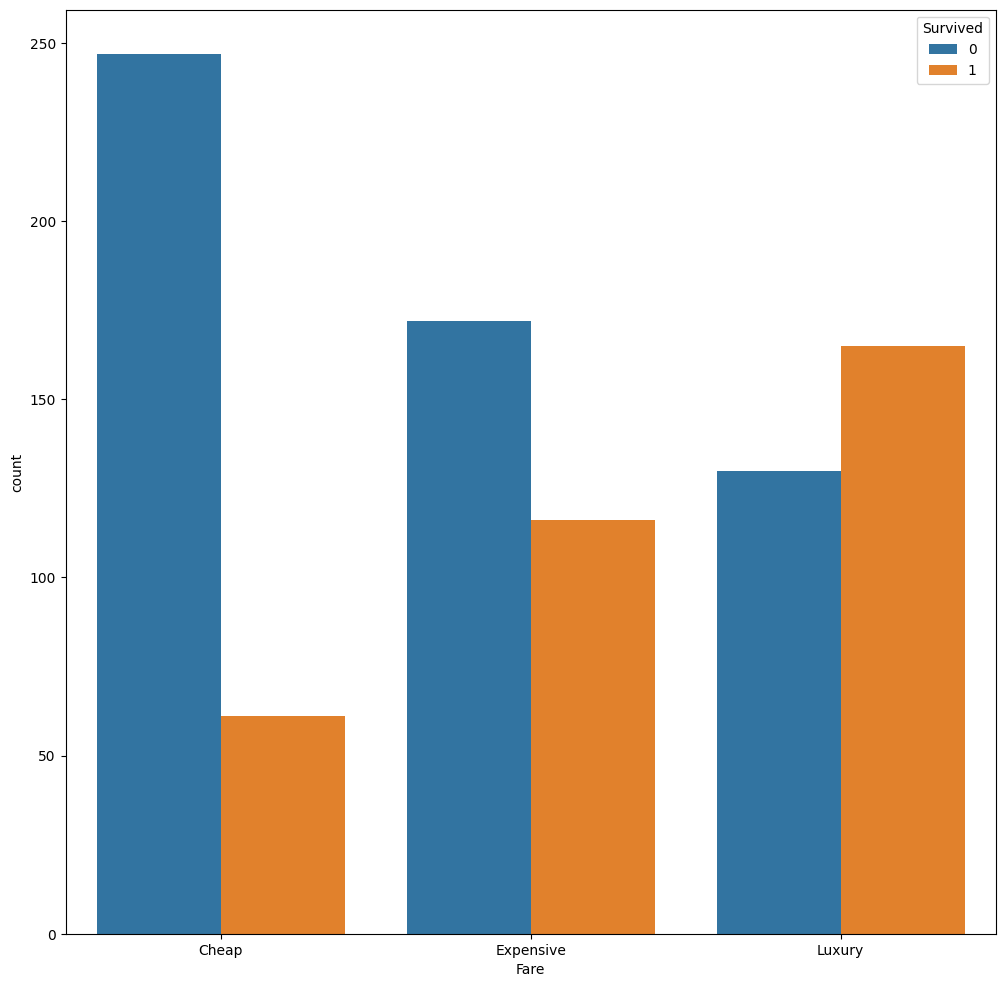

In [53]:
labels = ['Cheap', 'Expensive', 'Luxury']
bins = pd.qcut(df['Fare'], 3, labels=labels)
sns.countplot(x=bins)

plt.figure(figsize=(12,12))

### BEGIN SOLUTION
check2_sv = sns.countplot(x=bins, hue=df['Survived'].astype(str))
### END SOLUTION

plt.savefig('part_3.png')

**Nhận xét:** Ta nhận thấy ở mức giá vé cao hơn thì tỉ lệ sống sót sẽ được tăng mạnh

## 2. Tính toán Correlation

Ta xem lại dataframe và xem dataframe bị khuyết bao nhiêu dữ liệu

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

* Ta sẽ phải xoá đi cột `PassengerId` và cột `Name` vì 2 cột này sẽ không thể ảnh hưởng đến việc sống hoặc chết
* Ở khuôn khổ bài này, ta tạm thời không nói đến việc điền khuyết dữ liệu trống, nên những dòng bị khuyết dữ liệu, ta xoá đi
* Ta dùng kĩ thuật Ordinal Encoding ở cột `Sex` và `Embarked`

In [56]:
### BEGIN SOLUTION
df.drop(columns=['PassengerId', 'Name'], inplace=True)
df.dropna(inplace=True)
from sklearn.preprocessing import OrdinalEncoder
cols_to_encode = ['Sex', 'Embarked']
encoder = OrdinalEncoder()
df[cols_to_encode] = encoder.fit_transform(df[cols_to_encode])

### END SOLUTION

Mục đích của việc làm trên là để biến dữ liệu dạng category thành numerical và bỏ hết giá trị NaN để tính toán correlation giữa các feature

In [57]:
heatmap_val = df.corr()
heatmap_val

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


Ta dùng hàm `heatmap` của thư viện `seaborn` để vẽ heatmap.

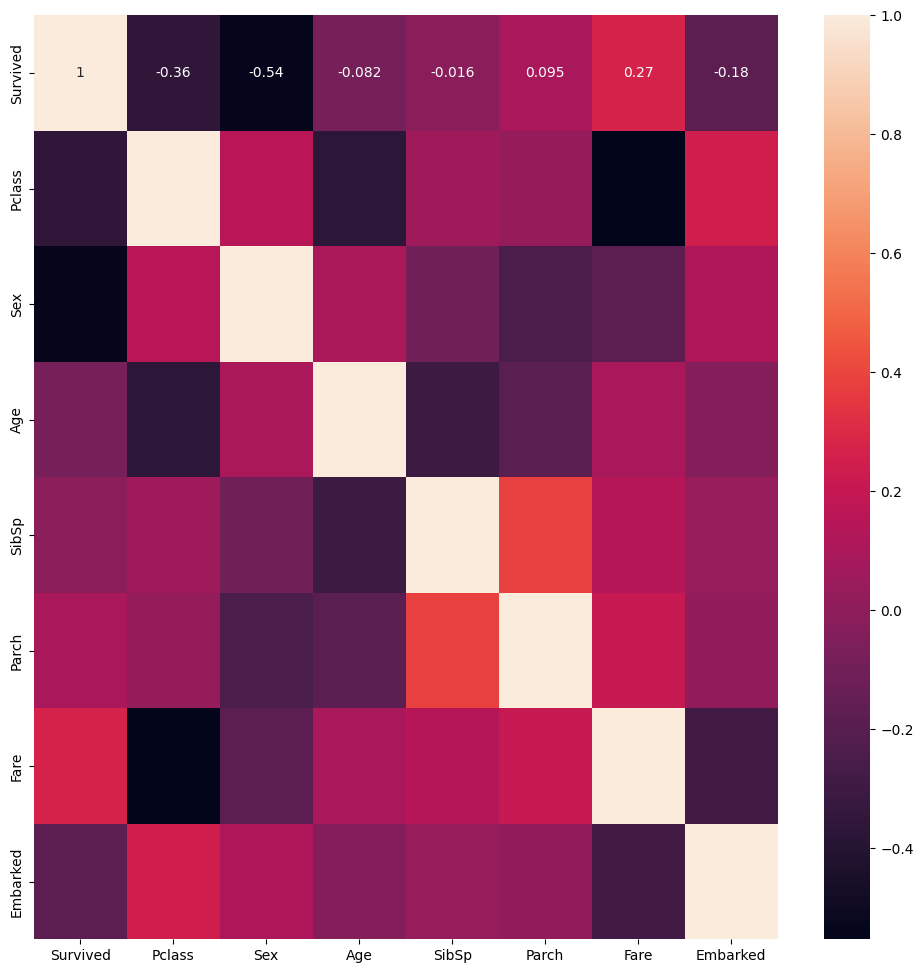

In [58]:
plt.figure(figsize=(12,12))
### BEGIN SOLUTION
sns.heatmap(heatmap_val, annot = True)
### END SOLUTION

plt.savefig('part_4.png')

Không ngoài dự đoán, 2 feature `SibSp` và `Parch` có độ tương đồng cao nhất (0.38) trong các feature